In [106]:
%matplotlib notebook
import sys
sys.path.append('..')
from bdots import ScopeChannel, MitlBdots
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
from collections import OrderedDict

In [165]:
class MachineDiagnostics:
    marx_volts_channels={'Groucho':'C1', 'Harpo':'C2','Chico':'D1', 'Zeppo':'D2'}
    line_volts_channels=marx_volts_channels
    line_dIdt_channels={'Groucho':'A1', 'Harpo':'A2','Chico':'B1', 'Zeppo':'B2'}
    trigger_volts_channels=line_dIdt_channels
    banks=['Groucho', 'Harpo','Chico','Zeppo']
    colours=['k', 'r', 'g', 'b']
    
    def __init__(self, shot):
        self.shot=shot
        self.marx_volts=[ScopeChannel(shot, "11", self.marx_volts_channels[b]) for b in self.banks]
        self.line_volts=[ScopeChannel(shot, "10", self.line_volts_channels[b]) for b in self.banks]
        self.line_dIdt=[ScopeChannel(shot, "10", self.line_dIdt_channels[b]) for b in self.banks]
        self.trigger_volts=[ScopeChannel(shot, "11", self.trigger_volts_channels[b]) for b in self.banks]
        self.diagnostics={'Marx Volts':self.marx_volts,
                                 'Line Volts':self.line_volts,
                                 'Line dI/dt':self.line_dIdt,
                                 'Trigger Volts':self.trigger_volts}
    def plot(self, figsize=(8,8)):
        fig, ax=plt.subplots(2,2, sharex=True, figsize=figsize)
        
        a=ax[0,0]
        name='Marx Volts'
        for n,b in enumerate(self.diagnostics[name]):
            a.plot(b.time, b.data, label=self.banks[n], color=self.colours[n])
        a.set_ylabel(name)
            
        a=ax[0,1]
        name='Line dI/dt'
        for n,b in enumerate(self.diagnostics[name]):
            a.plot(b.time, b.data, label=self.banks[n], color=self.colours[n])
        a.set_ylabel(name)
        
        a=ax[1,0]
        name='Line Volts'
        for n,b in enumerate(self.diagnostics[name]):
            a.plot(b.time, b.data, label=self.banks[n], color=self.colours[n])
        a.set_ylabel(name)
        
        a=ax[1,1]
        name='Trigger Volts'
        for n,b in enumerate(self.diagnostics[name]):
            a.plot(b.time, b.data, label=self.banks[n], color=self.colours[n])
        a.set_ylabel(name)
            
  
        a.set_xlim(250,2000)
        a.set_xticks([500, 1000,1500, 2000])
        a.xaxis.set_minor_locator(MultipleLocator(250))
        a.xaxis.set_major_locator(MultipleLocator(500))
        for a in ax.flatten():
            a.grid(which='minor', color='gray',linestyle=':')
            a.grid(which='major', color='black',linestyle='-')
        a.legend(bbox_to_anchor=(0.75, 0.95),
                bbox_transform=plt.gcf().transFigure,
                fontsize=10,
                ncol=4)
        fig.suptitle(self.shot)



class CompareMachineDiagnostics:
    banks=['Groucho', 'Harpo','Chico','Zeppo']
    def __init__(self, shots):
        self.shots=shots
        self.diagnostics = {s: MachineDiagnostics(s) for s in shots}
    def plot(self, figsize=(8,8)):
        fig, ax=plt.subplots(4,4, sharex=True, figsize=figsize)
        for s, d in self.diagnostics.items():
            for i,b in enumerate(d.marx_volts):
                ax[0,i].plot(b.time, b.data, label=s)
            for i,b in enumerate(d.line_volts):
                ax[1,i].plot(b.time, b.data, label=s)
            for i,b in enumerate(d.line_dIdt):
                ax[2,i].plot(b.time, b.data, label=s)
            for i,b in enumerate(d.trigger_volts):
                ax[3,i].plot(b.time, b.data, label=s)
        a=ax[0,0]
        a.set_xlim(250,2000)
        a.set_xticks([500,1000,1500,2000])
        a.xaxis.set_minor_locator(MultipleLocator(250))
        a.xaxis.set_major_locator(MultipleLocator(1000))
        a.set_ylabel('Marx Volts')
        
        a=ax[1,0]
        a.set_ylabel('Line Volts')
        a=ax[2,0]
        a.set_ylabel('Line dI/dt')
        a=ax[3,0]
        a.set_ylabel('Line Trigger')
        
        for i,a in enumerate(ax[0,:]):
            a.set_title(self.banks[i])

        for a in ax[-1,:]:
            a.set_xlabel('Time (ns)')

        for a in ax.flatten():
            a.grid(which='minor', color='gray',linestyle=':')
            a.grid(which='major', color='black',linestyle='-')
            
        a.legend(bbox_to_anchor=(0.7, 1),
                   bbox_transform=fig.transFigure,
                fontsize=12,
                ncol=len(self.shots))

In [168]:
shots=['s0531_17','s0601_17', 's0602_17']

m=MachineDiagnostics(shots[0])
c=CompareMachineDiagnostics(shots)

<IPython.core.display.Javascript object>


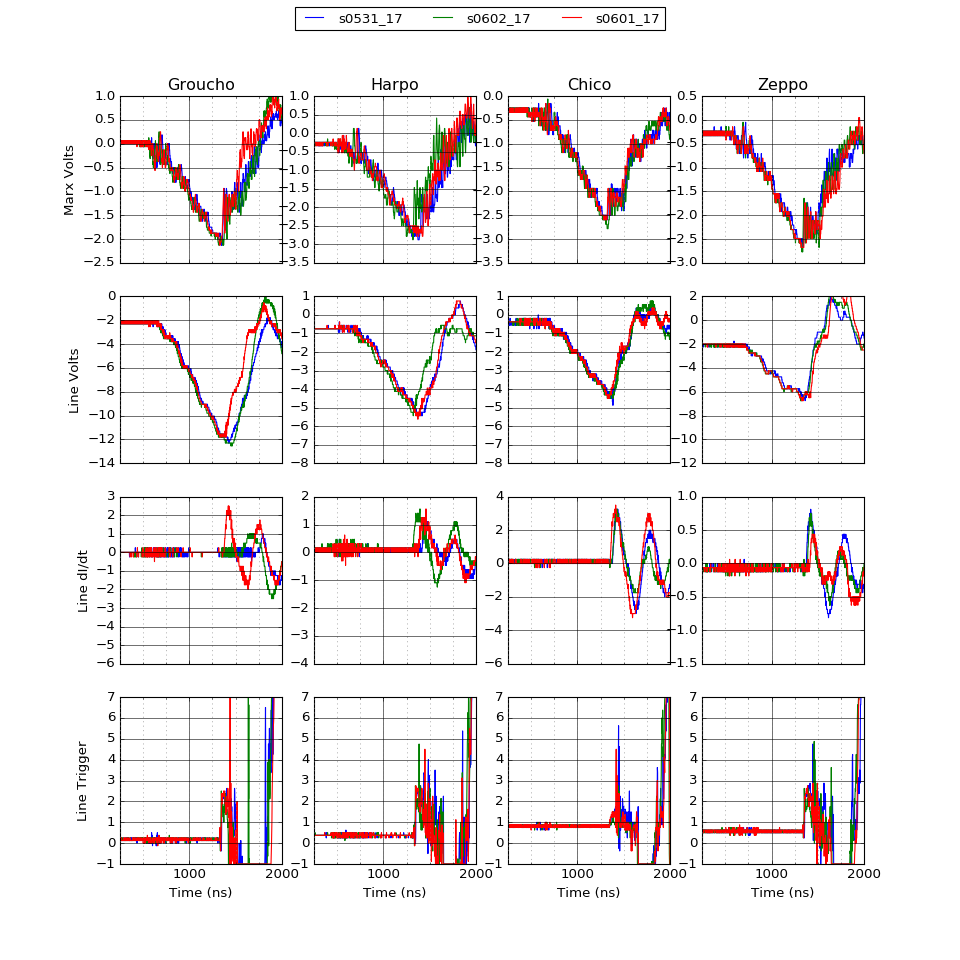

In [169]:
c.plot(figsize=(12,12))

<IPython.core.display.Javascript object>


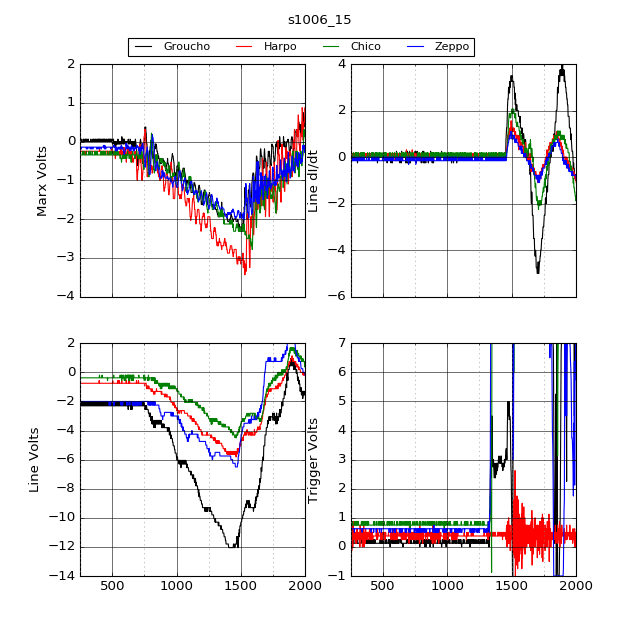

In [139]:
m.plot()